In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set_theme() 
from numpy.random import default_rng
rng = default_rng()

# Algorithme de Metropolis-Hastings 

Soit $E$ un ensemble dénombrable et $\mu$ une mesure de probabilité sur $E$. L'algorithme de Metropolis-Hastings permet de construire une chaîne de Markov de probabilité invariante $\mu$. 

Soit P une matrice permettant de parcourir l'espace d'état $E$ et $p$ la fonction définie comme suit : $ \forall x,y \in E, \rho (x,y) = \displaystyle \text{min} (1 , \frac{\mu (y) P(y,x)}{\mu (x) P(x,y)})$. 

On considère la matrice stochastique suivante : $ Q(x,y) = \begin{cases}
    P(x,y) \rho (x,y), & \text{si } x \neq y  \\
    1 - \displaystyle \sum _{z != x} Q(x,z), & \text{sinon } 
\end{cases}$ 

Sous ces hypothèes, la chaîne de Markov $(Y_n)_{n \geq 1}$ de matrice de transition $Q$ a pour unique probabilité invariante $\mu$ et converge en loi vers $\mu$. 

$ \forall x,y \in E, \rho (x,y) = \displaystyle \text{min} (1 , \frac{\mu (y) P(y,x)}{\mu (x) P(x,y)})$

La fonction $\rho$ est le taux d’acceptation du voisin $y$ proposé (en partant de la position $x$).

In [2]:
def rho(x,y, transition):
    return np.minimum(1, (mu(y) * transition(y,x)) / (mu(x) * transition(x,y)))

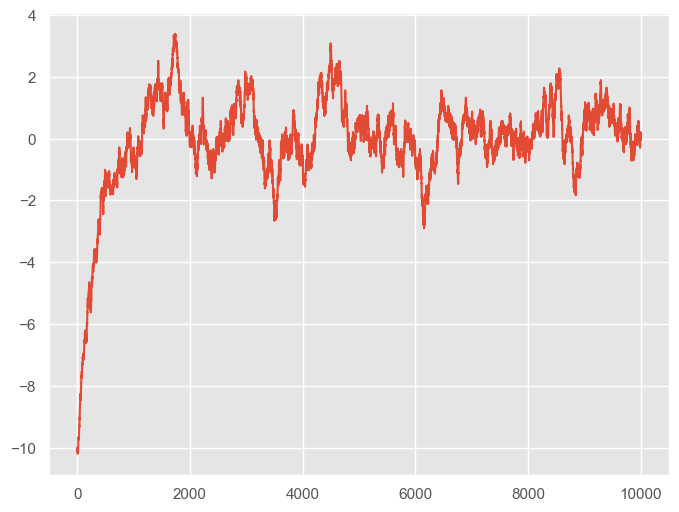

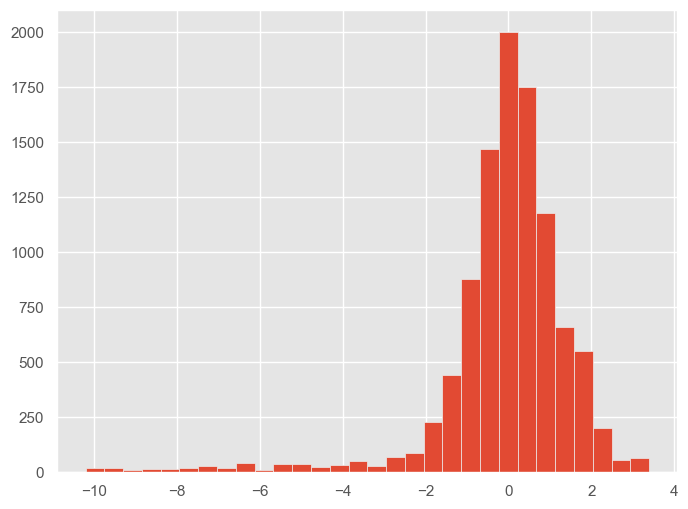

In [11]:
def metropolis(x, sigma=0.1, target=None):
    """ Metropolis en dimension 1
    
    """
    y = stats.norm.rvs(loc=x, scale=sigma)
    u = np.random.rand()
    lp = target.logpdf(y) - target.logpdf(x)  #toujours prendre le log pour des probas
    if np.log(u) < lp:
        return y
    else:
        return x

N = 10_000
x0 = -10.
sig = 0.1
target = stats.norm()
chain = np.empty(N)
chain[0] = x0
for i in range(1,N):
    chain[i] = metropolis(chain[i-1], sigma=sig, target=target)

plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(chain)
plt.show()

plt.figure(figsize=(8,6))
plt.hist(chain, 30)
plt.show()

Plus je prends un sigma petit, est plus il me faudra des itérations pour arriver à la loi cible (petits pas). x0 a aussi son importance ! 
Si je prends un sigma trop grand, il y a un risque d'avoir un trop grand nombre de candidats refusés.

Penser à écarter les premières itérations !!!! 

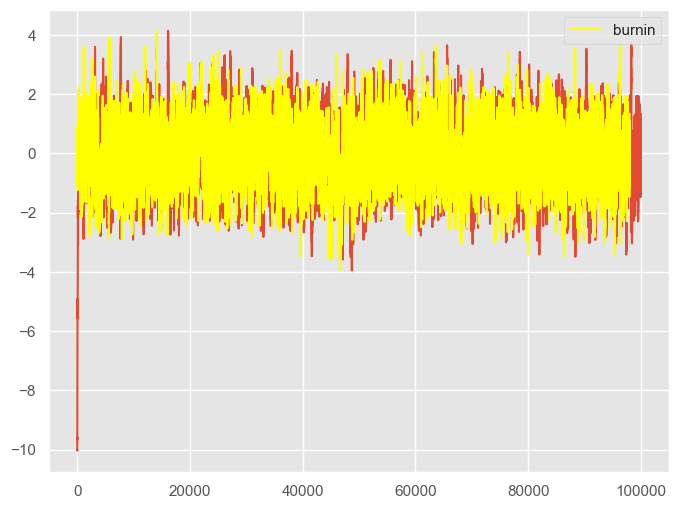

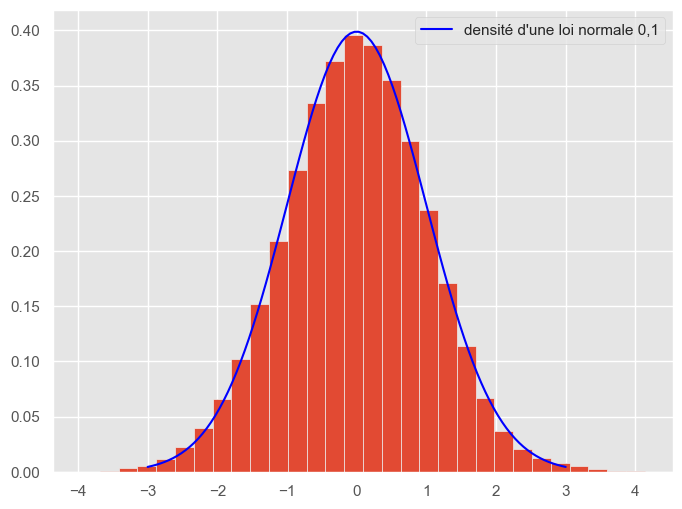

In [19]:
N = 100_000
burnin = 2_000
x0 = -10.
sig = 0.25
target = stats.norm()
chain = np.empty(N)
chain[0] = x0
for i in range(1,N):
    chain[i] = metropolis(chain[i-1], sigma=sig, target=target)

plt.style.use('ggplot')
plt.figure(figsize=(8,6))
plt.plot(chain)
plt.plot(chain[burnin:], label='burnin', color='yellow')
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
plt.hist(chain[burnin:], 30, density=True)
xx = np.linspace(-3,3,100)
plt.plot(xx, stats.norm.pdf(xx), color="blue", label="densité d'une loi normale 0,1")
plt.legend()
plt.show()

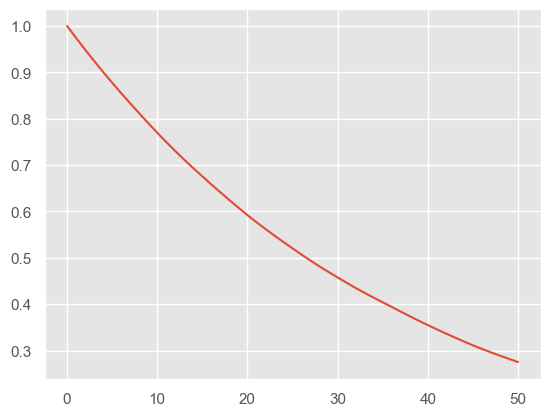

In [22]:
from statsmodels.tsa.stattools import acf 
plt.plot(acf(chain[burnin:], nlags=50))

## Exemple sur $\mathbb{Z}$

$\forall x \in \mathbb{Z}, \mu (x) = \frac{1}{5} e^{- \frac{|x|}{5}}$ et $P$ la matrice de transition telle que : $P(x,x+1) = P(x,x-1) = \frac{1}{2}$.

In [3]:
def mu(x): 
    return np.exp(- np.abs(x) / 5)

def phi(in_n, out_np1):  #deux tableaux NumPy
    proposals = in_n + (2*rng.integers(2, size=len(in_n))-1)  #à chaque itération, un élément de in_n est augmenté de 1 ou réduit de 1 de manière aléatoire
    ratio_rho = np.minimum(mu(proposals) / mu(in_n), 1)  #rapport de probabilité de transition
    accepted = rng.uniform(size=len(in_n)) < ratio_rho
    out_np1[accepted] = proposals[accepted]
    out_np1[~accepted] = in_n[~accepted]
    return out_np1

In [4]:
ech = 1001
trajectoires = 10000

sample = np.zeros((ech, trajectoires))
for n in range(1, ech):
    phi(sample[n-1], sample[n])

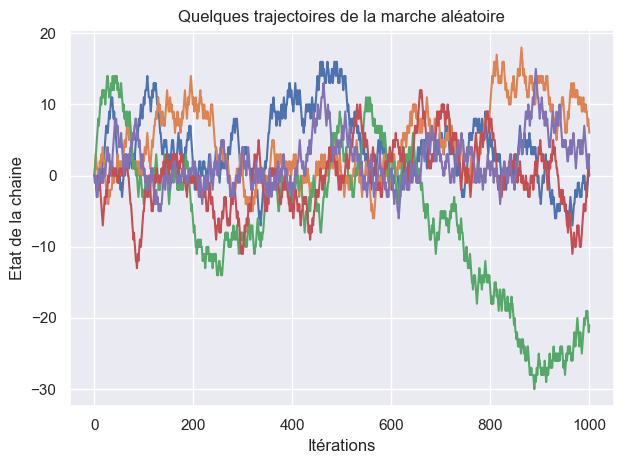

In [5]:
fig, ax = plt.subplots(layout='tight')
ax.plot(np.arange(ech), sample[:,:5])
ax.set_ylabel('Etat de la chaine')
ax.set_xlabel('Itérations')
ax.set_title('Quelques trajectoires de la marche aléatoire')
plt.show()

## Un autre exemple 

<Figure size 640x480 with 0 Axes>

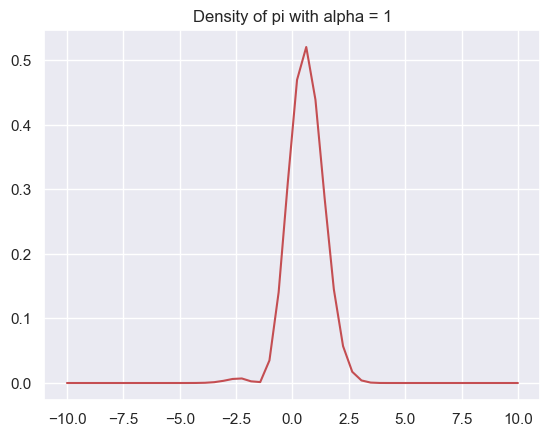

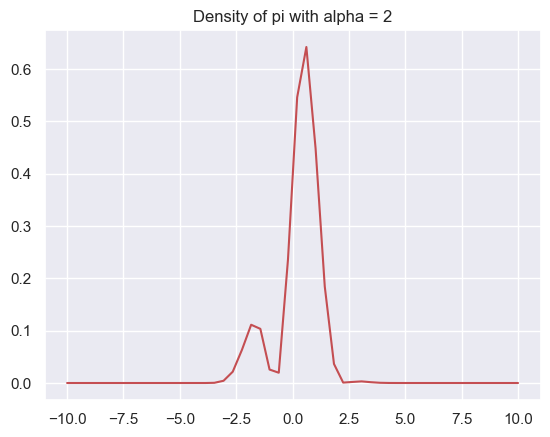

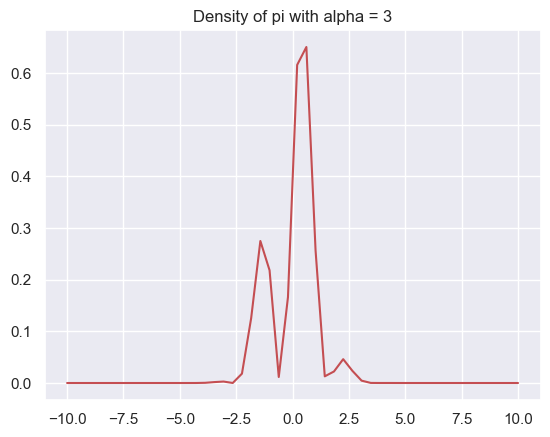

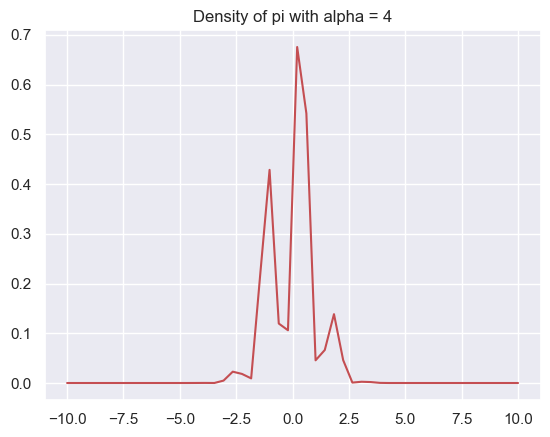

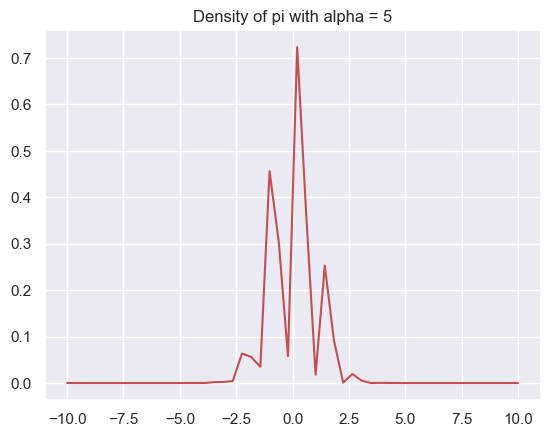

In [12]:
def function_pi(alpha, x):
    return (1 / np.sqrt(2 * math.pi)) * np.exp(- x**2 / 2) * (1 + np.sin(alpha * x))
plt.figure()

for alpha in [1, 2, 3, 4, 5]:
    plt.figure()
    x=np.linspace(-10,10)
    y= function_pi(alpha, x)
    plt.plot(x,y,"r")
    plt.title(f"Density of pi with alpha = {alpha}")
    plt.show()